In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[4]

'deer'

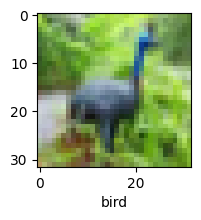

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[6])
plt.xlabel(classes[y_train[6]])
plt.show()

In [ ]:
# note:- x_train carry images, whereas y_train carry the class_name

In [25]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
# applying ann

In [14]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
ann.fit(x_train,y_train,epochs=5)   

Epoch 1/5
1563/1563 [==============================] - 490s 312ms/step - loss: 1.8803 - accuracy: 0.3112
Epoch 2/5
1563/1563 [==============================] - 471s 301ms/step - loss: 1.6825 - accuracy: 0.3927
Epoch 3/5
1563/1563 [==============================] - 463s 296ms/step - loss: 1.5852 - accuracy: 0.4297
Epoch 4/5
1563/1563 [==============================] - 492s 315ms/step - loss: 1.5116 - accuracy: 0.4594
Epoch 5/5
1563/1563 [==============================] - 504s 323ms/step - loss: 1.4622 - accuracy: 0.4767


In [15]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 19s 59ms/step - loss: 1.4790 - accuracy: 0.4723


[1.478954553604126, 0.4722999930381775]

In [16]:
[y_test[:5]]

[array([[3],
        [8],
        [8],
        [0],
        [6]], dtype=uint8)]

In [17]:
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 19s 59ms/step


In [20]:
y_pred_classes[:5]

[3, 8, 8, 8, 4]

In [23]:
from sklearn.metrics import classification_report

In [22]:
print("classificaton report :-")
print(classification_report(y_test,y_pred_classes))

classificaton report :-
              precision    recall  f1-score   support

           0       0.55      0.50      0.52      1000
           1       0.65      0.55      0.60      1000
           2       0.36      0.35      0.36      1000
           3       0.40      0.25      0.31      1000
           4       0.36      0.46      0.40      1000
           5       0.52      0.26      0.34      1000
           6       0.42      0.71      0.52      1000
           7       0.59      0.45      0.51      1000
           8       0.45      0.78      0.57      1000
           9       0.62      0.41      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [ ]:
# so as we can see that the result above is unsatisfactory while using 'ann' with only 48 percent accuracy on test data and 47 percent on train data

In [ ]:
# now applying cnn

In [26]:
cnn=models.Sequential([
    # cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
    

In [27]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 123s 77ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 2/10
1563/1563 [==============================] - 121s 78ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 3/10
1563/1563 [==============================] - 123s 79ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - -3489s -2233581us/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/10
1563/1563 [==============================] - 125s 80ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 6/10
 448/1563 [=======>......................] - ETA: 1:22 - loss: 2.3028 - accuracy: 0.0967